# **ML PROJECT**

###ASHRITHA K <BR>
###PULKIT KHANDELWAL


# Orbit Classification using Machine Learning

This notebook looks into using various Python-based ML and Data Science libraries in an attempt to build a Machine Learning
model capable of classifing orbits based on various attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling


## 1. Problem Defintion

In a statement,
> Given various factors about the orbits in the form of independent variables, which can be used to classify the orbits?

## 2. Data

The original data came from the Cleavland data from the Kaggle Machine Learning Repository


<a href="https://www.kaggle.com/brsdincer/orbitclassification">orbit classification</a>

## 3. Evaluation

**Target to reach more than 85%**

If the model scored better than 85% we will select the model


##4.Features <br>
Available Features are<br>

a (AU) -- Semi-major axis of the orbit in AU<br>
e -- Eccentricity of the orbit<br>
i (deg) -- Inclination of the orbit with respect to the ecliptic plane and the equinox of J2000 (J2000-Ecliptic) in degrees<br>
w (deg) -- Argument of perihelion (J2000-Ecliptic) in degrees<br>
Node (deg) -- Longitude of the ascending node (J2000-Ecliptic) in degrees<br>
M (deg) -- Mean anomoly at epoch in degrees<br>
q (AU) -- Perihelion distance of the orbit in AU<br>
Q (AU) -- Aphelion distance of the orbit in AU<br>
P (yr) -- Orbital period in Julian years<br>
H (mag) -- Absolute V-magnitude<br>
MOID (AU) -- Minimum orbit intersection distance (the minimum distance between the osculating orbits of the NEO and the Earth<br>
class -- Object classification<br>
CLASS:<br>

AMO*<br>
APO*<br>
ATE*<br>
IEO*<br>


## Preparing the tools
 
**We are going to use :-**

* Pandas & Numpy for Data Analysis and Manipulation


* Matplotlib and Seaborn for Data Visualisation


* Scikit-Learn for the Modeling building and Reports

In [ ]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#from statsmodels.graphics.mosaicplot import mosaic

#Packages for balancing the data
import imblearn
import collections
from collections import Counter
from imblearn.over_sampling import RandomOverSampler


#model evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#packages for ANN modelling
import tensorflow as tf
from tensorflow import keras 


#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



### Importing the dataset

In [ ]:
df = pd.read_csv('/content/classast - pha.csv')

In [ ]:
df[df['class']=="IEO*"]

,a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),P (yr),H (mag),MOID (AU),class
499,0.635223,0.531191,18.944737,352.990462,37.032202,286.188737,0.2978,0.97,0.51,18.4,0.039215,IEO*
1078,0.695024,0.379828,24.309431,183.634613,81.146237,279.794034,0.4310,0.96,0.58,18.6,0.025944,IEO*
1357,0.713032,0.361445,6.666512,190.419666,8.932719,238.431984,0.4553,0.97,0.60,20.2,0.031333,IEO*
1457,0.752169,0.271088,19.197821,347.461645,358.659388,354.276236,0.5483,0.96,0.65,20.3,0.046425,IEO*
1555,0.666377,0.471604,4.090186,42.268044,314.979143,53.255281,0.3521,0.98,0.54,20.3,0.044641,IEO*


### Head of the dataset

In [ ]:
#First 5 records of the dataset
df.head() 

,a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),P (yr),H (mag),MOID (AU),class
0,1.078066,0.826854,22.825495,31.382966,88.010681,215.528772,0.1867,1.97,1.12,16.90,0.034507,APO*
1,1.245304,0.335342,13.337482,276.893024,337.207958,104.155606,0.8277,1.66,1.39,15.60,0.030669,APO*
2,1.470264,0.559922,6.352995,285.852564,35.736768,174.626213,0.6470,2.29,1.78,16.25,0.025795,APO*
3,1.776025,0.650141,39.832538,267.791993,356.903343,173.188556,0.6214,2.93,2.37,15.20,0.003551,APO*
4,1.874123,0.764602,1.326400,43.388048,349.694944,235.158622,0.4412,3.31,2.57,18.80,0.011645,APO*


<br><br>
# Exploratory Data analysis
<br>

###Shape of the Data

In [ ]:
df.shape

(1748, 12)

### Information about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a (AU)      1748 non-null   float64
 1   e           1748 non-null   float64
 2   i (deg)     1748 non-null   float64
 3   w (deg)     1748 non-null   float64
 4   Node (deg)  1748 non-null   float64
 5   M (deg)     1748 non-null   float64
 6   q (AU)      1748 non-null   float64
 7   Q (AU)      1748 non-null   float64
 8   P (yr)      1748 non-null   float64
 9   H (mag)     1748 non-null   float64
 10  MOID (AU)   1748 non-null   float64
 11  class       1748 non-null   object 
dtypes: float64(11), object(1)
memory usage: 164.0+ KB


### Description about the dataset

In [ ]:
#Statistical Description of the data
df.describe()

,a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),P (yr),H (mag),MOID (AU)
count,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000
mean,1.745759,0.527417,13.312400,180.497546,172.251967,180.809702,0.756564,2.735000,2.423793,19.966796,0.023348
std,0.690729,0.179629,11.614397,99.661178,102.737794,107.280935,0.221101,1.344958,2.088742,1.506929,0.014309
min,0.635223,0.025425,0.146084,0.521838,0.136042,0.052165,0.092800,0.960000,0.510000,14.100000,0.000010
25%,1.265084,0.408588,4.875430,95.635077,82.401816,83.230489,0.617025,1.767500,1.420000,19.100000,0.011070
50%,1.698290,0.549531,9.315508,185.986518,168.528048,182.880959,0.815600,2.605000,2.210000,20.200000,0.022994
75%,2.179176,0.653530,18.796947,266.913890,256.374858,275.895719,0.936075,3.580000,3.220000,21.200000,0.034802
max,17.818679,0.956042,75.412403,359.662669,359.854602,359.825201,1.060100,34.680000,75.220000,22.400000,0.049987


### Are there any missing values?

In [ ]:
#Checking for null values
print(df.isnull().sum())

a (AU)        0
e             0
i (deg)       0
w (deg)       0
Node (deg)    0
M (deg)       0
q (AU)        0
Q (AU)        0
P (yr)        0
H (mag)       0
MOID (AU)     0
class         0
dtype: int64


### Checking for outliers

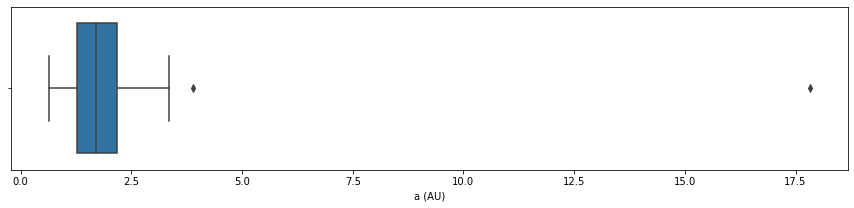

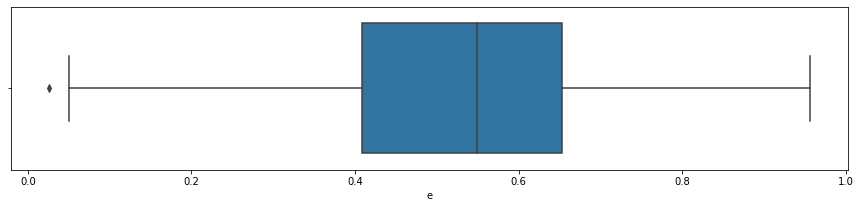

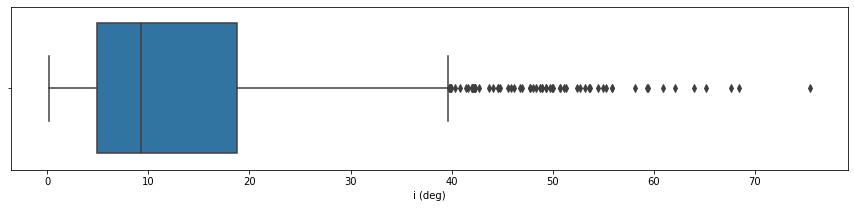

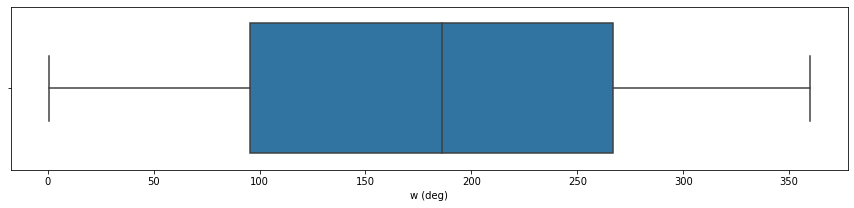

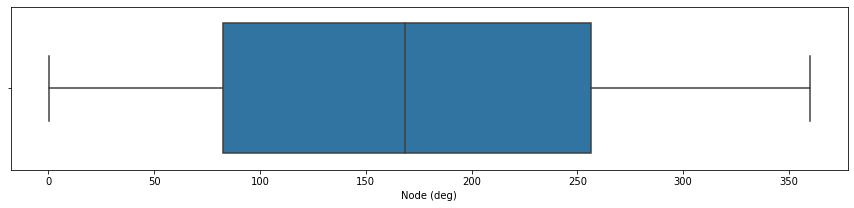

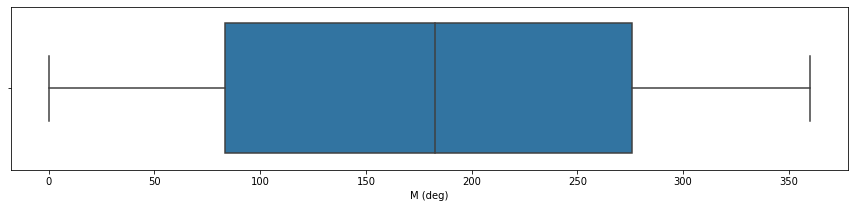

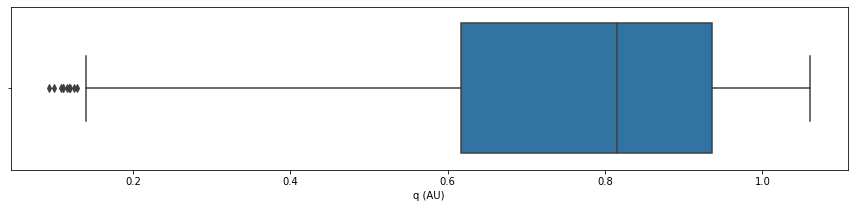

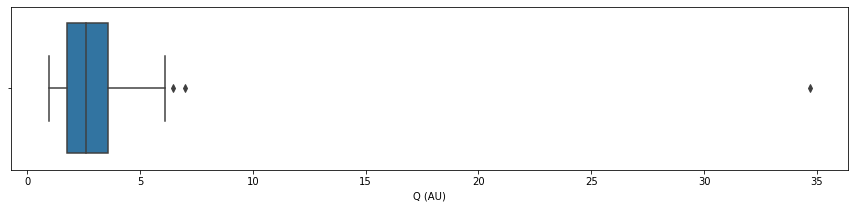

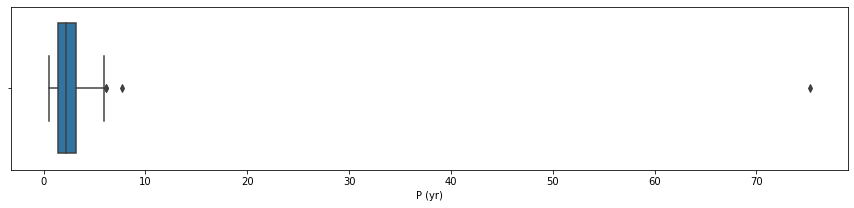

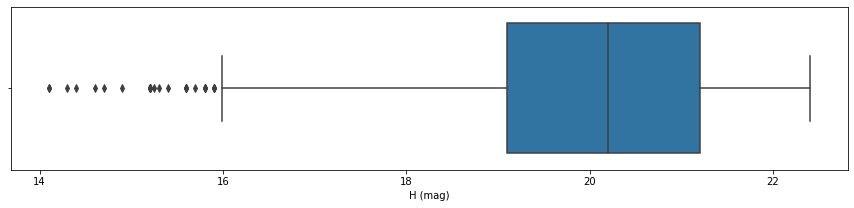

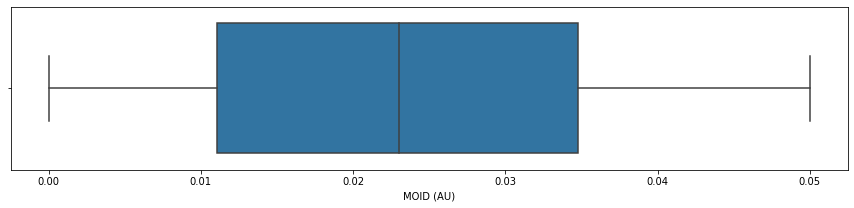

In [ ]:
# Numerical features exploration

features = df.iloc[:, :11].columns.to_list()

for col in features:
    
    plt.figure(figsize=(15,3))
    sns.boxplot(x = df[col])
    plt.show()

### outliers are present in the columns like semi major axis of the orbit,orbital period, absolute magnitude,aphelion distance of the orbit.

##Visualisation

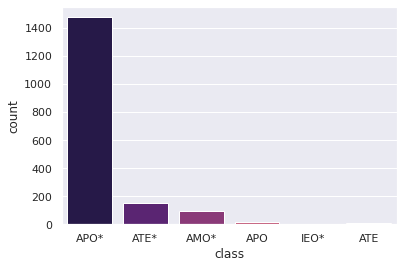

In [ ]:
#countplot of the different orbit classes
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="class", data=df,palette="magma")

### In the above countplot orbital class APO* holds the highest followed by the ATE* and AMO*

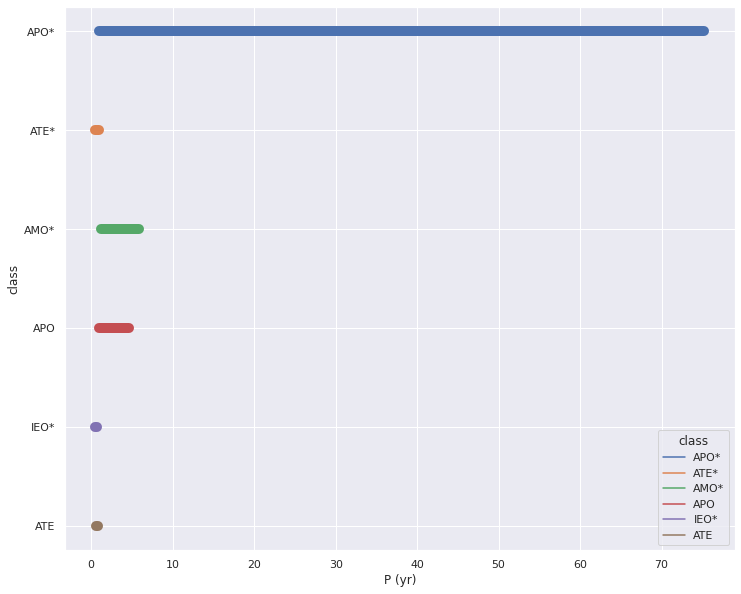

In [ ]:
#lineplot of different orbit classes over the years
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,10))
sns.lineplot(x="P (yr)",y = "class",hue="class",linewidth=10,data=df)


### In the above lineplot the orbital class APO* has the orbital period over 75 years whereas the other orbits like AMO* and APO have less than 10 years of orbital period

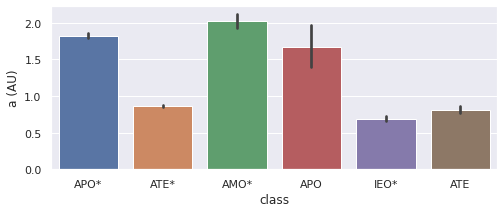

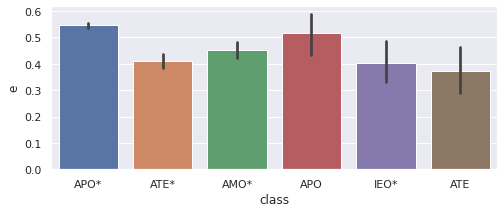

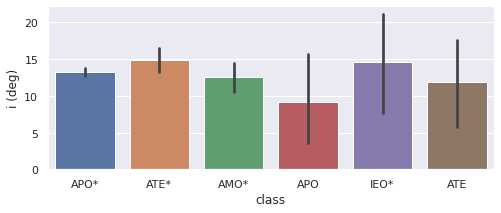

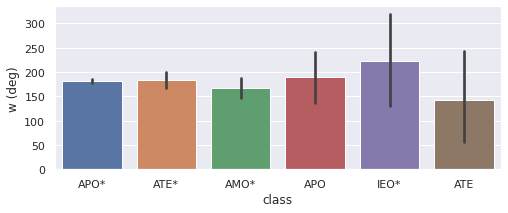

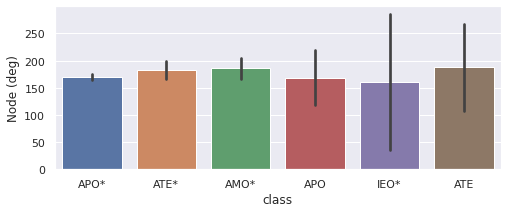

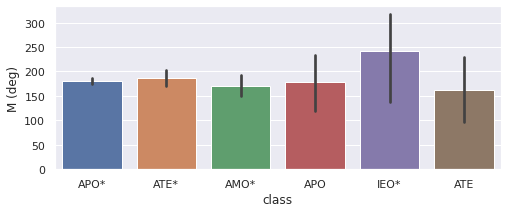

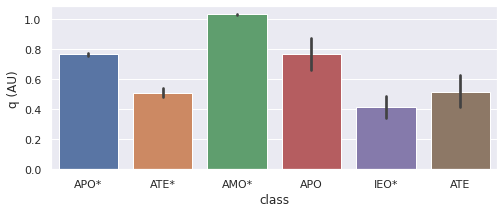

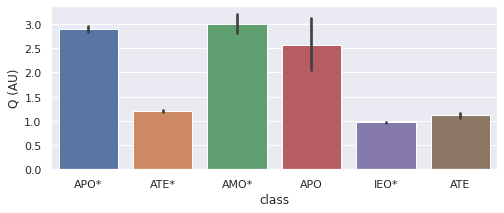

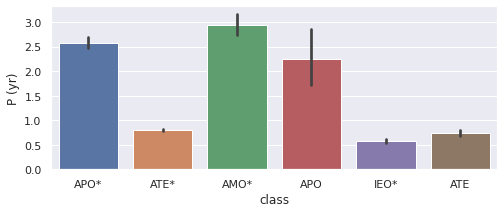

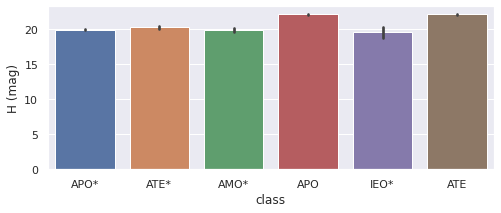

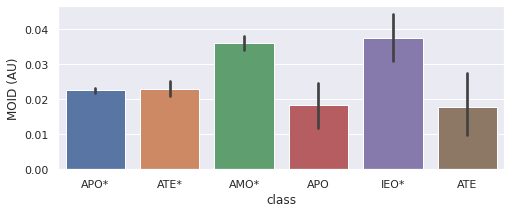

In [ ]:
#barplot of different orbit classes with respect to each column factor
features = df.iloc[:, :11].columns.to_list()

for col in features:
    
    plt.figure(figsize=(8,3))
    sns.barplot(x = df["class"],y = df[col])
    plt.show()

### The above barplot of each column feature of orbits with respect to the orbital class

<Figure size 576x216 with 0 Axes>

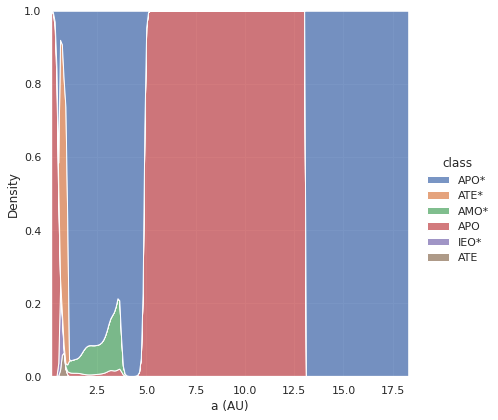

<Figure size 576x216 with 0 Axes>

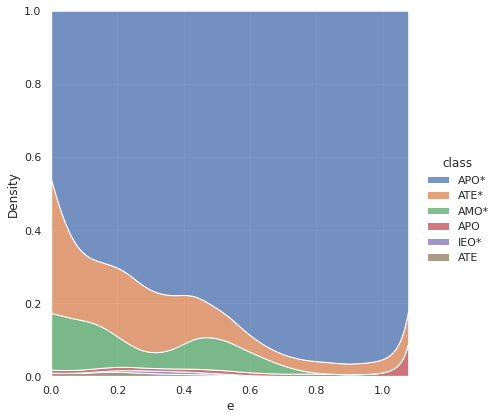

<Figure size 576x216 with 0 Axes>

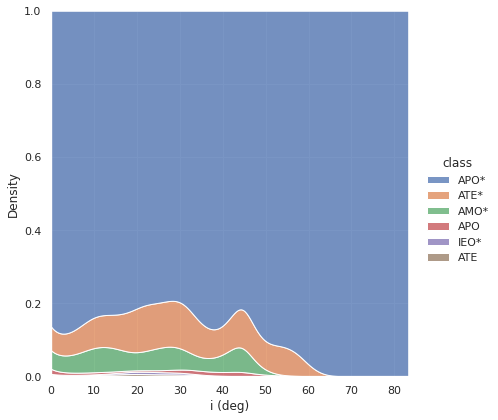

<Figure size 576x216 with 0 Axes>

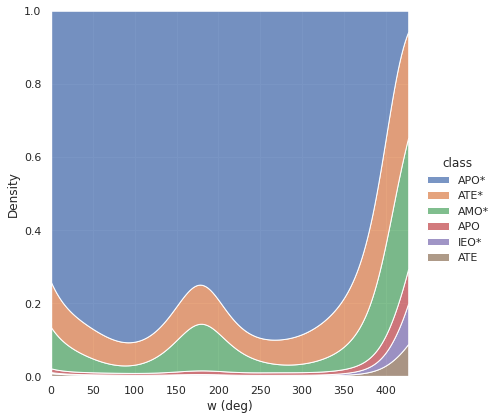

<Figure size 576x216 with 0 Axes>

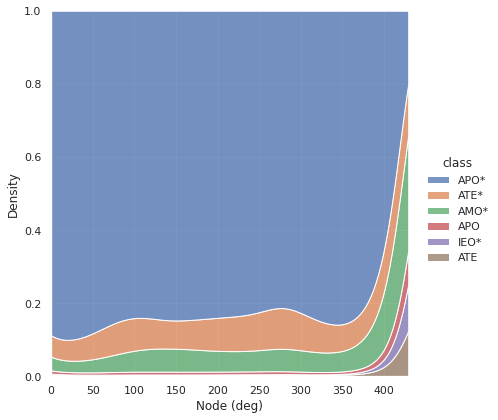

<Figure size 576x216 with 0 Axes>

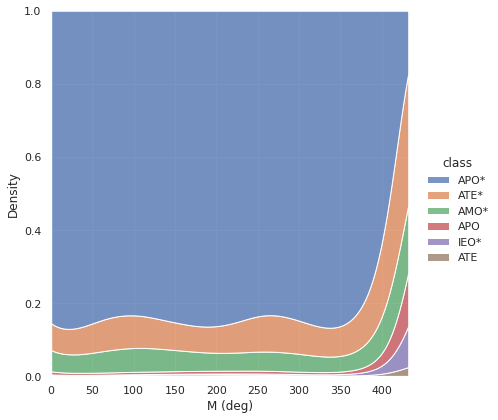

<Figure size 576x216 with 0 Axes>

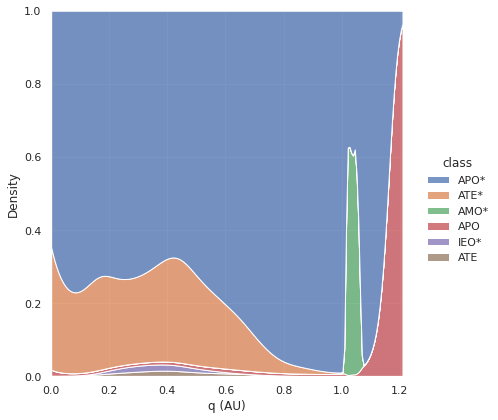

<Figure size 576x216 with 0 Axes>

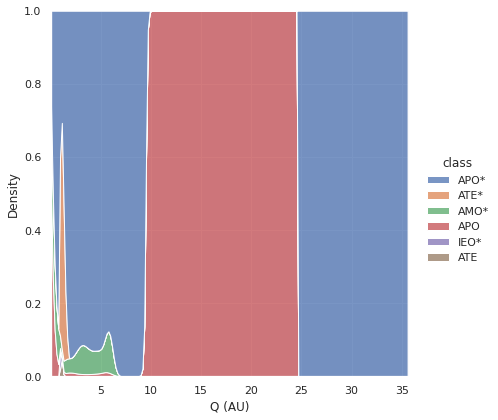

<Figure size 576x216 with 0 Axes>

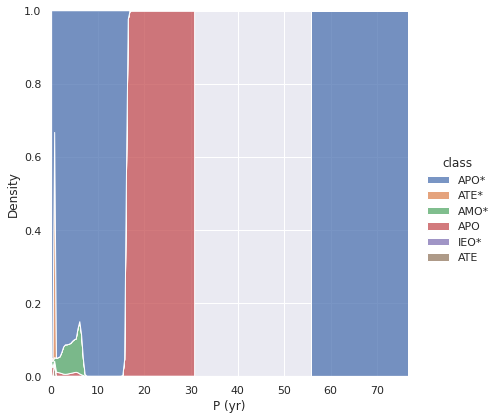

<Figure size 576x216 with 0 Axes>

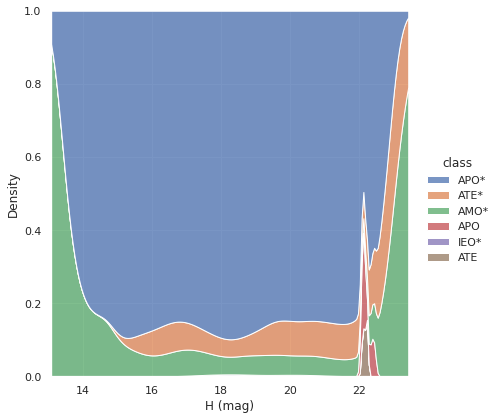

<Figure size 576x216 with 0 Axes>

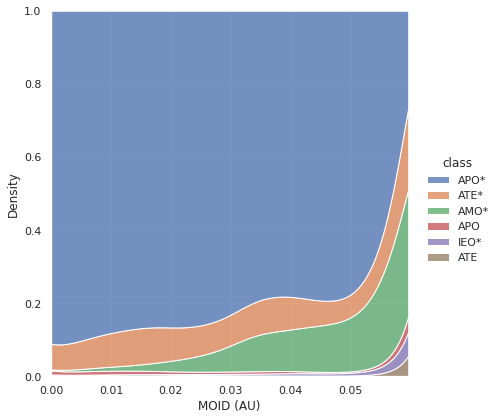

In [ ]:
#distplot of different orbit classes with respect to each column factor
features = df.iloc[:, :11].columns.to_list()

for col in features:
    
    plt.figure(figsize=(8,3))
    sns.displot(data=df,x = df[col],hue = "class",kind="kde", height=6,
    multiple="fill", clip=(0, None))
    plt.show()

### The density plot of each column feature of orbits with respect to the orbital class

<Figure size 800x640 with 0 Axes>

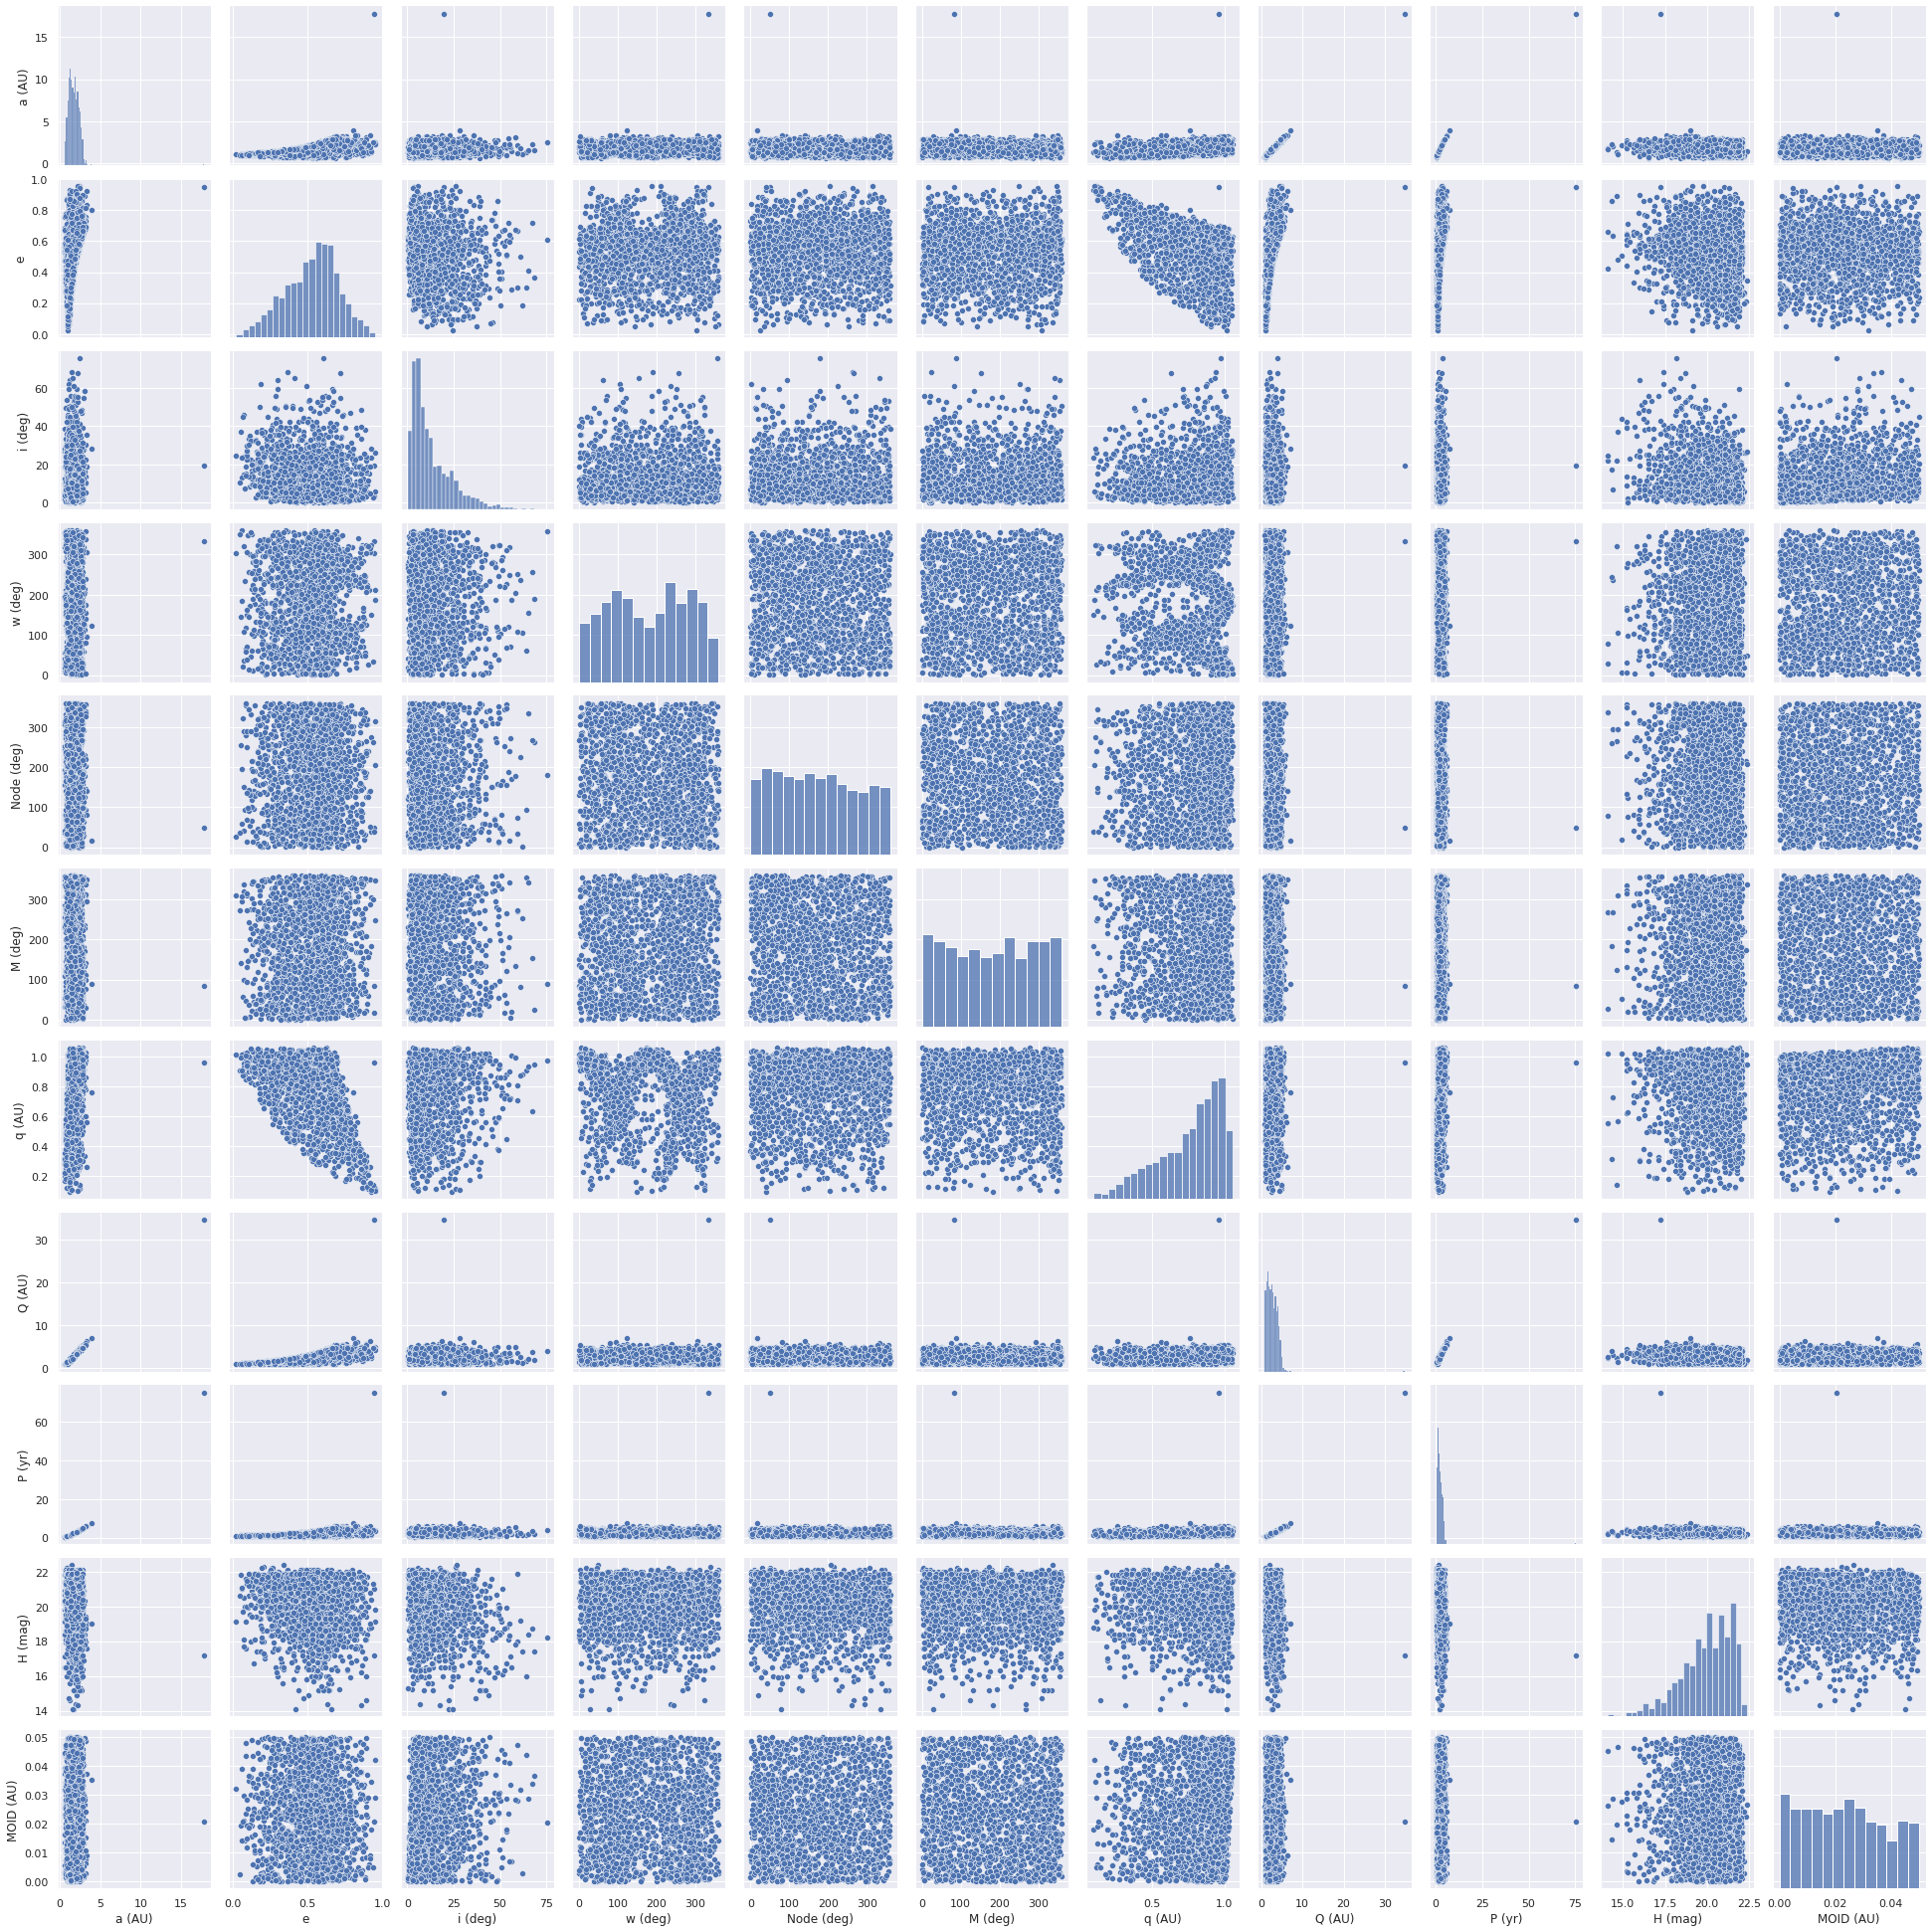

In [ ]:
#scatterplot of the data
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter")
plt.show()

### scatterplot of the data shows the nature of the data aligned among the column features

### Removing the outliers from the columns

In [ ]:
#checking for inter quantile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

a (AU)          0.914092
e               0.244942
i (deg)        13.921517
w (deg)       171.278812
Node (deg)    173.973042
M (deg)       192.665230
q (AU)          0.319050
Q (AU)          1.812500
P (yr)          1.800000
H (mag)         2.100000
MOID (AU)       0.023732
dtype: float64


In [ ]:
#removing the rows with outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1647, 12)

### Label Encoding the orbit classes

In [ ]:
#label encoding the orbital classes
encoder = LabelEncoder()
print("classes before encoding:",df['class'].unique())
df['class']= encoder.fit_transform(df['class'])
print("classes after encoding:",df['class'].unique())


classes before encoding: ['APO*' 'ATE*' 'AMO*' 'APO' 'IEO*' 'ATE']
classes after encoding: [2 4 0 1 5 3]


### Correlation matrix & Matrix Visualisation

In [ ]:
#Correlation of Data
df.corr()

,a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),P (yr),H (mag),MOID (AU),class
a (AU),1.000000,0.636683,-0.189575,-0.023235,0.006205,0.003118,0.296110,0.982065,0.996362,-0.144397,0.016008,-0.440217
e,0.636683,1.000000,-0.235909,0.014075,-0.010093,0.058573,-0.494462,0.760057,0.633353,-0.119259,-0.044477,-0.102113
i (deg),-0.189575,-0.235909,1.000000,0.034713,-0.028658,-0.011385,0.043893,-0.205890,-0.178598,-0.149839,0.115107,0.063393
w (deg),-0.023235,0.014075,0.034713,1.000000,-0.068146,0.016671,-0.062156,-0.011991,-0.020837,0.005045,0.023677,0.023595
Node (deg),0.006205,-0.010093,-0.028658,-0.068146,1.000000,-0.016799,0.007840,0.004812,0.008318,-0.043970,0.033077,-0.001881
M (deg),0.003118,0.058573,-0.011385,0.016671,-0.016799,1.000000,-0.061648,0.015493,0.000919,0.002241,-0.019017,0.034694
q (AU),0.296110,-0.494462,0.043893,-0.062156,0.007840,-0.061648,1.000000,0.110727,0.278455,-0.024349,0.086681,-0.454716
Q (AU),0.982065,0.760057,-0.205890,-0.011991,0.004812,0.015493,0.110727,1.000000,0.981764,-0.145434,-0.000441,-0.368323
P (yr),0.996362,0.633353,-0.178598,-0.020837,0.008318,0.000919,0.278455,0.981764,1.000000,-0.144881,0.015004,-0.401437
H (mag),-0.144397,-0.119259,-0.149839,0.005045,-0.043970,0.002241,-0.024349,-0.145434,-0.144881,1.000000,-0.041766,0.022203


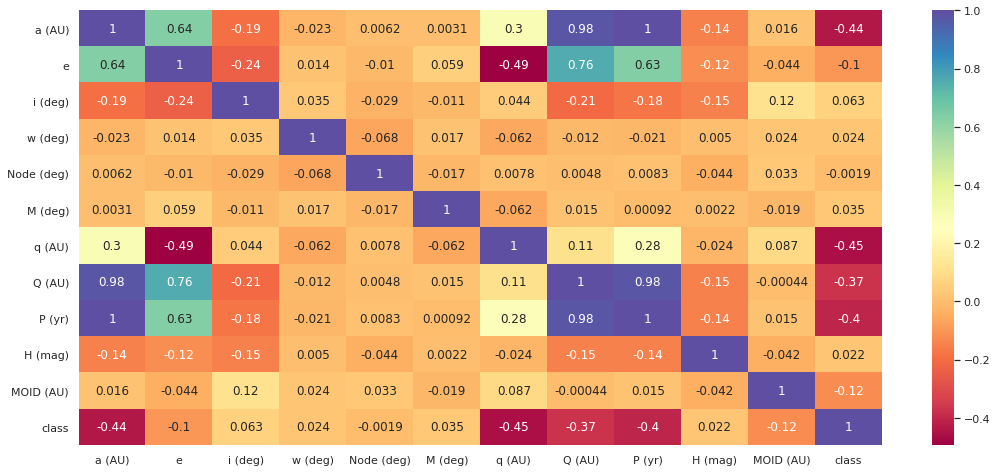

In [ ]:
#plotting the heatmap
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap= 'Spectral')
plt.show()

### In the above correlation heatmap the columns inclination , magnitude ,argument of perihelion are positively correlated with respect to the orbit class.

### Balancing the imbalanced classes 

In [ ]:
#value counts of each class
df['class'].value_counts()

2    1387
4     142
0      92
1      14
3       7
5       5
Name: class, dtype: int64

In [ ]:
#assigning x and y variables
x = df.drop(['class'],axis = 1)
y = df['class']

In [ ]:
#balancing the imbalanced classes
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({2: 1387, 4: 142, 0: 92, 1: 14, 3: 7, 5: 5})
Resample dataset shape Counter({2: 1387, 4: 1387, 0: 1387, 1: 1387, 5: 1387, 3: 1387})


### One hot encoding

In [ ]:
# one hot encoding of the target classes
x = x_ros
y = y_ros

onehot_encoder = OneHotEncoder(sparse=False)
y = y.reshape(len(y), 1)
y = onehot_encoder.fit_transform(y)
print(y)


[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


### 5. Modeling

#### Splitting the data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 10,test_size = 0.2)

### Standardising the data for modelling

In [ ]:
sc = StandardScaler()
ann_train = sc.fit_transform(x_train)
ann_test = sc.transform(x_test)

### Artificial Neural Network

In [ ]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(input_dim=11,units=8, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=6, activation='softmax'))

In [ ]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training the ANN on the Training set
ann.fit(ann_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
209/209 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9896
Epoch 2/100
209/209 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9898
Epoch 3/100
209/209 [==============================] - 1s 2ms/step - loss: 0.0356 - accuracy: 0.9907
Epoch 4/100
209/209 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9901
Epoch 5/100
209/209 [==============================] - 1s 3ms/step - loss: 0.0347 - accuracy: 0.9908
Epoch 6/100
209/209 [==============================] - 1s 3ms/step - loss: 0.0339 - accuracy: 0.9898
Epoch 7/100
209/209 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9914
Epoch 8/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9911
Epoch 9/100
209/209 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9914
Epoch 10/100
209/209 [==============================] - 0s 2ms/step - loss: 0.0303 - accura

In [ ]:
# Predicting the Test set results
ann_pred = ann.predict(ann_test)


In [ ]:
#ann_pred = ann.predict_classes(ann_test)

In [ ]:
#inversing the encoded labels in the target variable
ann_pred = np.argmax(ann_pred, axis=1)
y_test2 = np.argmax(y_test, axis=1)

In [ ]:
#testing score of the model
accuracy_score(y_test2,ann_pred)

0.9843843843843844

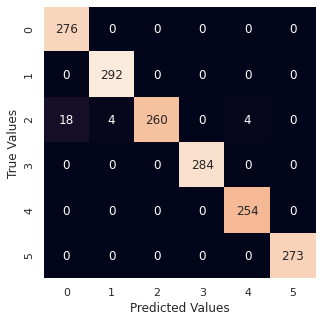

In [ ]:
#confusion Matrix 
conf_mat = confusion_matrix(y_test2,ann_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show();

In [ ]:
#classification report
print(metrics.classification_report(y_test2, ann_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       276
           1       0.99      1.00      0.99       292
           2       1.00      0.91      0.95       286
           3       1.00      1.00      1.00       284
           4       0.98      1.00      0.99       254
           5       1.00      1.00      1.00       273

    accuracy                           0.98      1665
   macro avg       0.98      0.98      0.98      1665
weighted avg       0.99      0.98      0.98      1665

